<a href="https://colab.research.google.com/github/Liping-LZ/BDAI_2425/blob/main/Data%20Preprocessing%20and%20EDA/BDAI_Data_Preprocessing_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding and Preprocessing Data with Pandas

Welcome to this interactive Python notebook, where we embark on a journey through the essential stages of data understanding and preprocessing. Our goal is to equip you with the knowledge and practical skills to prepare datasets for further analysis or machine learning tasks. This notebook serves as a comprehensive guide, designed for both beginners data enthusiasts, educators, or anyone looking to refine their data handling capabilities.

## Notebook Overview

In data science and machine learning, the quality and preparation of the data are as crucial as the models themselves. Raw data often comes with various challenges such as missing values, outliers, and unnecessary information that might skew analysis or model performance. Addressing these issues effectively requires a systematic approach to understanding and preprocessing the data.

### What You Will Learn:

- **Data Loading:** How to import your data into a Pandas DataFrame, the first step in any data analysis task.
  
- **Data Inspection:** Techniques to explore and inspect the data to understand its structure, content, and potential issues that need addressing.
  
- **Data Cleaning:** Strategies for dealing with common data issues, including handling missing values, removing duplicates, and correcting data types.
  
- **Outlier Detection and Handling:** Methods to identify and mitigate the impact of outliers that could potentially skew the analysis.
  
- **Feature Engineering:** Basic techniques for transforming existing features and creating new ones to better represent the underlying patterns in the data.
  
- **Correlation Analysis:** Understanding the relationships between features using correlation matrices and visualizations.
  
- **Feature Selection:** Identifying and selecting the most relevant features for your analysis or predictive modeling tasks.

Throughout this notebook, we will apply these concepts to the *Individual Household Electric Power Consumption* dataset, a rich dataset that presents common challenges in data analysis. We will use Pandas, a powerful and flexible data manipulation library in Python, to perform our tasks.

### Dataset Overview

The [*Individual Household Electric Power Consumption*](https://moodle.warwick.ac.uk/pluginfile.php/4059565/mod_folder/content/0/Week%203/Dataset/household_power_consumption.csv?forcedownload=1) dataset contains measurements of electric power consumption. You can read more about it on the [UCI Machine Learning Repository.](https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption)

## Load the Dataset onto Google Colab

In [47]:
# First, we need to load the dataset into Google Colab.
# This statement allows you to select the file from your laptop and upload it to Google Cloud.
# Please wait until you see 100% done and the play button is resumed. it might take a while to upload because the dataset is large

# Import necessary Python libraries
from google.colab import files

#Upload the dataset to Google Colab
uploaded = files.upload()

Saving household_power_consumption.csv to household_power_consumption.csv


#### Read the dataset as a Pandas Dataframe

*file_path* contains the name of the dataset you want to work with. For this example, the dataset must have the CSV format.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


# Step 1: Load the dataset
# Assuming the dataset is stored locally as 'household_power_consumption.txt'
# Replace the path with the correct path to your dataset file
file_path = 'household_power_consumption.csv'
dataset = pd.read_csv(file_path,low_memory=False)

---

## Understanding the Dataset

Before going though preprocessing tasks, it's crucial to gain an understanding of the dataset you're working with. This initial exploration is a step that informs how you approach cleaning and preparing your data for analysis or modeling. Let's outline the key aspects we aim to uncover about our dataset during this initial exploration phase:

### Dimensions of the Dataset

Understanding the size of your dataset gives you a sense of the volume of data you're dealing with. It involves finding out how many rows (observations) and columns (features/attributes) your dataset contains. This information can help in estimating the resources you might need for processing the data and whether the dataset is sufficiently large for the intended analysis.

### Data Types of Each Variable

Datasets comprise various types of information, and each feature (column) within a dataset can hold data of a particular type — numerical (integers or floats), categorical (strings or objects), or date/time. Knowing the data type of each variable is essential for two reasons:
- It helps in deciding the appropriate statistical methods or machine learning models that can be applied.
- It informs the necessary data type conversions or transformations needed before analysis.

### Previewing the Data

Taking a peek at the first few and last few rows of the dataset can provide a quick snapshot of what your data looks like. This step helps in confirming if the data matches your expectations based on what you know about the dataset or the domain. It also allows you to spot any obvious inconsistencies or anomalies in the data, such as formatting errors, missing values, or outliers.

### Attributes

Knowing the name of each attribute is crucial for understanding the features available in your dataset. Attributes give insights into the information captured by the dataset, which is vital for both analysis and storytelling with data. It's also the first step in identifying any irrelevant features that might be excluded from further analyses.

By addressing these aspects, you're laying the foundation for effective data cleaning and preparation. This approach ensures that the subsequent steps you take are informed and intentional, leading to more reliable outcomes from your data analysis efforts.

In [49]:
# Verify the dataset size
print("Size of the dataset:", dataset.shape)
print("Hence, this dataset has",dataset.shape[0], "observations (rows) and",dataset.shape[1], "features/aatributes (columns)")

Size of the dataset: (2075259, 8)
Hence, this dataset has 2075259 observations (rows) and 8 features/aatributes (columns)


In [50]:
# Peek onto the first rows of the dataset
print("First five rows of the dataset:")
dataset.head()

First five rows of the dataset:


,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [51]:
# Peek onto the last rows of the dataset
print("Last five rows of the dataset:")
dataset.tail()

Last five rows of the dataset:


,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,2010-11-26 21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0
2075258,2010-11-26 21:02:00,0.932,0.000,239.550,3.800,0.000,0.000,0.0


In [52]:
# Verify the data type of each attribute
print("Data type of each dataset feature:\n")
print("Feature:\t\tData Type:")
print(dataset.dtypes)

Data type of each dataset feature:

Feature:		Data Type:
DateTime                  object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object


---

## Data Preprocessing: Introduction to Data Transformation

Data transformation is part of the data preprocessing phase, crucial for preparing the raw dataset into a format that is suitable for further analysis, visualization, or modeling. This process involves converting data into a standardized format, correcting data types, and potentially creating new variables that are more informative or relevant for the analysis. Performing these tasks helps in enhancing the quality of the data, ensuring accuracy in the results, and improving the performance of predictive models.

Data transformation is necessary when the format of raw data are not suitable for analysis. For instance, variables may be in incorrect data types, dates may be represented as strings, or there may be inconsistencies such as the use of placeholder values for missing data. Without transformation, these issues can lead to incorrect analyses, errors in data processing, or inefficient modeling. By standardizing the dataset, we ensure that the data adheres to a consistent format, thereby enabling accurate and meaningful insights.

### Data Transformation in the Individual Household Electric Power Consumption Dataset

Given the dataset's scope, capturing detailed electricity consumption within households, it includes a variety of data types and potential for missing values. The following transformations are crucial for this dataset:

1. **Replacing Placeholder Values:** The dataset uses `'?'` to denote missing values, which are not inherently recognized by most data analysis tools. Replacing these with `NaN` allows for proper identification and handling of missing data.

2. **Converting Date and Time Formats:** Dates and times are initially represented as strings, which limits the ability to perform time-series analysis or extract date-related features. Converting these to appropriate datetime formats enables more sophisticated temporal analyses and facilitates easier extraction of date and time components.

3. **Correcting Data Types:** Numeric data represented as strings cannot be directly used in calculations or modeling. Converting these columns to numeric types ensures that statistical analyses and machine learning models can be applied effectively.

4. **Creating New Variables:** Extracting the month and year from the date not only simplifies the analysis of seasonal patterns and trends over time but also enriches the dataset with additional features that may be relevant for predictive modeling.

In [53]:
# 1. Convert Date from string to datetime format
dataset['DateTime'] = pd.to_datetime(dataset['DateTime'], format='%Y-%m-%d %H:%M:%S')

In [54]:
# 2. Create two new columns: 'month' and 'year' from the 'Date' column
dataset['Month'] = dataset['DateTime'].dt.month
dataset['Year'] = dataset['DateTime'].dt.year

In [55]:
# 3. Modify data type of the remaining columns to the correct numeric data type
for feature in dataset.columns:
    if feature not in ['DateTime']:
        dataset[feature] = pd.to_numeric(dataset[feature], errors='coerce')

In [56]:
# Check the data
print("First five rows of the dataset:")
dataset.head()

First five rows of the dataset:


,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,12,2006
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,12,2006
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,12,2006
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,12,2006
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,12,2006


In [57]:
# Check the data type again after data transformation
print("Data type of each dataset feature:\n")
print("Feature:\t\tData Type:")
print(dataset.dtypes)

Data type of each dataset feature:

Feature:		Data Type:
DateTime                 datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Month                             int32
Year                              int32
dtype: object


---

## Data Preprocessing: Introduction to Data Cleaning

Data cleaning is a critical preprocessing step aimed at rectifying irregularities and errors in the dataset. It involves identifying and correcting (or removing) corrupt, inaccurate, or irrelevant parts of the data, which are often inevitable in large datasets. This step is essential for ensuring that subsequent data analysis and modeling are based on reliable and accurate data, thereby leading to more valid conclusions and predictions.

Data, especially when collected from real-world sources, is rarely clean and ready for analysis. It may contain errors such as missing values, duplicates, or outliers that can significantly skew analysis results and predictive model performance. Data cleaning helps in:
- **Improving Data Quality:** By removing or correcting anomalies and errors, the overall quality of the data is enhanced.
- **Enhancing Analysis Accuracy:** Clean data reduces the risk of misleading results in analysis and ensures that insights derived from the data are valid.
- **Boosting Model Performance:** Machine learning models trained on clean data are likely to perform better, as they learn the underlying patterns in the data rather than being influenced by noise or errors.

### Data Cleaning in the Individual Household Electric Power Consumption Dataset

Given its comprehensive capture of electric power consumption in individual households, the dataset is prone to common data quality issues, making data cleaning an indispensable step. The executed data cleaning steps include:

1. **Handling Missing Values:** Missing data can distort statistical analyses and hinder model performance. By removing missing values or replacing them, we ensure that analyses are based on complete observations and that models learn from the most accurate representations of the data.

2. **Dropping Duplicates:** Duplicate entries can arise from data collection or integration processes, leading to biased analyses by artificially inflating certain observations. Identifying and removing duplicates helps maintain the integrity of statistical measures and model estimates.

3. **Removing Outliers:** Outliers can significantly affect statistical analyses and predictive modeling, potentially leading to erroneous conclusions. Identifying and addressing outliers helps in focusing the analysis on the typical patterns within the data, thereby improving the robustness of statistical estimates and model predictions.

In [58]:
# Verify if missing values exists
print("The number of missing values per feature is:\n")
print("Feature:\t\tMissing Values:")
print(dataset.isnull().sum())

The number of missing values per feature is:

Feature:		Missing Values:
DateTime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Month                        0
Year                         0
dtype: int64


In [59]:
# Removing missing values. The dropna command will delete all rows that contains missing values in one or more columns.
dataset.dropna(inplace=True)

print("Size of the dataset after removing missing values:", dataset.shape)
print("Hence, this dataset now has",dataset.shape[0], "observations (rows) and",dataset.shape[1], "features/aatributes (columns)")

Size of the dataset after removing missing values: (2049280, 10)
Hence, this dataset now has 2049280 observations (rows) and 10 features/aatributes (columns)


In [ ]:
# Alternatively, you can replace the missing values. Following, the missing values are replaced with the mean value of the column.

dataset['Global_active_power'].fillna(dataset['Global_active_power'].mean(), inplace=True)
dataset['Global_reactive_power'].fillna(dataset['Global_reactive_power'].mean(), inplace=True)
dataset['Voltage'].fillna(dataset['Voltage'].mean(), inplace=True)
dataset['Global_intensity'].fillna(dataset['Global_intensity'].mean(), inplace=True)
dataset['Sub_metering_1'].fillna(dataset['Sub_metering_1'].mean(), inplace=True)
dataset['Sub_metering_2'].fillna(dataset['Sub_metering_2'].mean(), inplace=True)
dataset['Sub_metering_3'].fillna(dataset['Sub_metering_3'].mean(), inplace=True)

print("Size of the dataset after removing missing values:", dataset.shape)
print("Hence, this dataset now has",dataset.shape[0], "observations (rows) and",dataset.shape[1], "features/aatributes (columns)\n")

print("The number of missing values per feature is:")
print("Feature:\t\tMissing Values:")
dataset.isnull().sum()

In [60]:
# Removing duplicates: Drop duplicate rows to ensure data quality
dataset.drop_duplicates(inplace=True)

### Outliers

The Interquartile Range (IQR) outlier identification method is a statistical technique used to detect outliers by focusing on the spread of the middle 50% of data points. The IQR is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the dataset, which represents the range within which the central half of the data lies.

Outliers are then identified by determining which data points fall outside of this central range by a certain distance. Typically, data points are considered outliers if they are more than 1.5 times the IQR below the first quartile (Q1 - 1.5\*IQR) or above the third quartile (Q3 + 1.5\*IQR). This method is widely used due its robustness to the presence of outliers, as it relies on percentiles that are not influenced by extreme values.

The IQR method is particularly useful because it can effectively handle skewed distributions and is less affected by extreme values compared to methods that rely on mean and standard deviation. This makes it a popular choice for outlier detection in many fields, including statistics, finance, and data science.

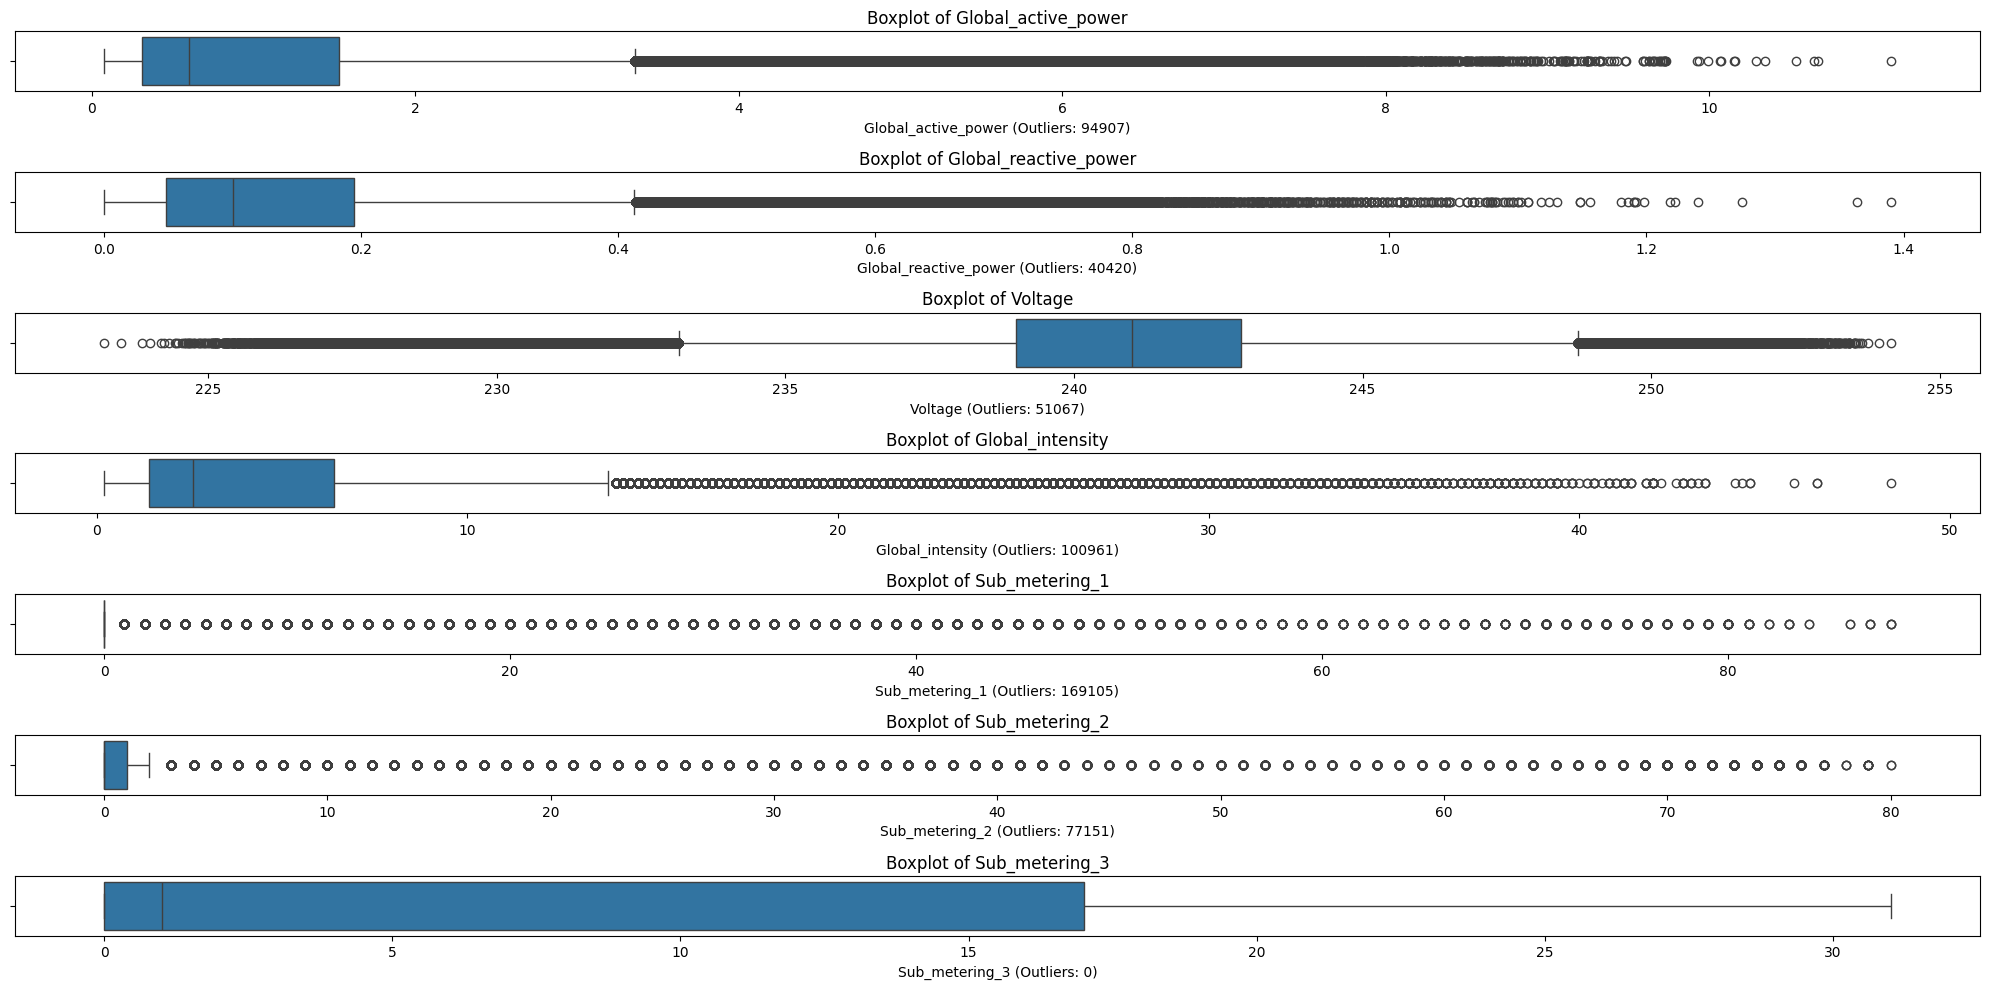

In [61]:
# Select numeric columns for plotting boxplots and calculating outliers
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

# Plotting boxplots for each numeric column and calculating the number of outliers
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot of {col}')

    # Calculating IQR
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Counting outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    n_outliers = outliers.shape[0]

    plt.xlabel(f'{col} (Outliers: {n_outliers})')
plt.tight_layout()
plt.show()

In [62]:
# Removing outliers from the 'Global_active_power' column based on the IQR
Q1 = dataset['Global_active_power'].quantile(0.25)
Q3 = dataset['Global_active_power'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Copying the dataset into dataset_cleaned by filtering out outliers
dataset_cleaned = dataset[(dataset['Global_active_power'] >= lower_bound) & (dataset['Global_active_power'] <= upper_bound)]

In [63]:
# Size of the dataset without outliers (dataset_cleaned)
print("Size of the dataset after removing missing values:", dataset_cleaned.shape)
print("Hence, this dataset now has",dataset_cleaned.shape[0], "observations (rows) and",dataset_cleaned.shape[1], "features/aatributes (columns)")

Size of the dataset after removing missing values: (1954373, 10)
Hence, this dataset now has 1954373 observations (rows) and 10 features/aatributes (columns)


In [ ]:
# You can save the Preprocessed and cleaned dataset for future use.
dataset_cleaned.to_csv('household_power_consumption_cleaned.csv')
files.download('household_power_consumption_cleaned.csv')

---

# Exploratory Data Analysis Overview

We can uncover insights from the Individual Household Electric Power Consumption dataset through Exploratory Data Analysis (EDA). EDA is a process that allows us to understand the underlying patterns, relationships, and anomalies in the data, which can inform further analysis, hypothesis generation, and predictive modeling.

1. **Descriptive Statistics:** We can analyse the data by computing descriptive statistics, providing a summary overview of the central tendency, dispersion, and shape of the dataset's distribution. This step helps identify initial patterns, potential outliers, and the general data structure.

In [64]:
# Displaying descriptive statistics for the cleaned dataset
print("Descriptive Statistics for the Cleaned Dataset:")
display(dataset_cleaned[numeric_cols].describe())

Descriptive Statistics for the Cleaned Dataset:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.954373e+06,1.954373e+06,1.954373e+06,1.954373e+06,1.954373e+06,1.954373e+06,1.954373e+06
mean,9.357102e-01,1.200253e-01,2.410301e+02,3.967266e+00,3.664040e-01,7.294426e-01,6.051739e+00
std,7.797621e-01,1.086249e-01,3.124697e+00,3.248314e+00,3.177699e+00,3.198650e+00,8.298438e+00
min,7.600000e-02,0.000000e+00,2.239900e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.020000e-01,4.800000e-02,2.392400e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.240000e-01,9.800000e-02,2.411500e+02,2.400000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.456000e+00,1.900000e-01,2.429800e+02,6.000000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,3.358000e+00,1.240000e+00,2.541500e+02,1.640000e+01,5.200000e+01,5.200000e+01,3.100000e+01


2. **Distribution Analysis:** By examining the distribution of key features such as `Global_active_power`, we can gain insights into the consumption behavior captured in the dataset. Histograms and density plots facilitates understanding the variability and skewness in electricity consumption.

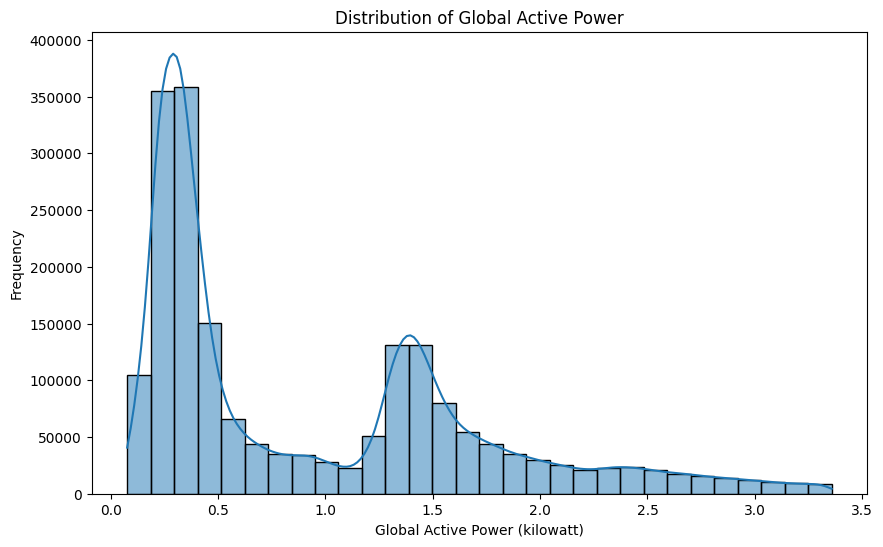

In [65]:
# Distribution of Global_active_power
plt.figure(figsize=(10, 6))
sns.histplot(dataset_cleaned['Global_active_power'], kde=True, bins=30)
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kilowatt)')
plt.ylabel('Frequency')
plt.show()

3. **Time Series Analysis:** Given the temporal nature of the dataset, we can explore electricity consumption trends over time. This involves aggregating data at various time intervals—hourly, daily, weekly, and yearly—to identify patterns, seasonal effects, and long-term trends in power usage.

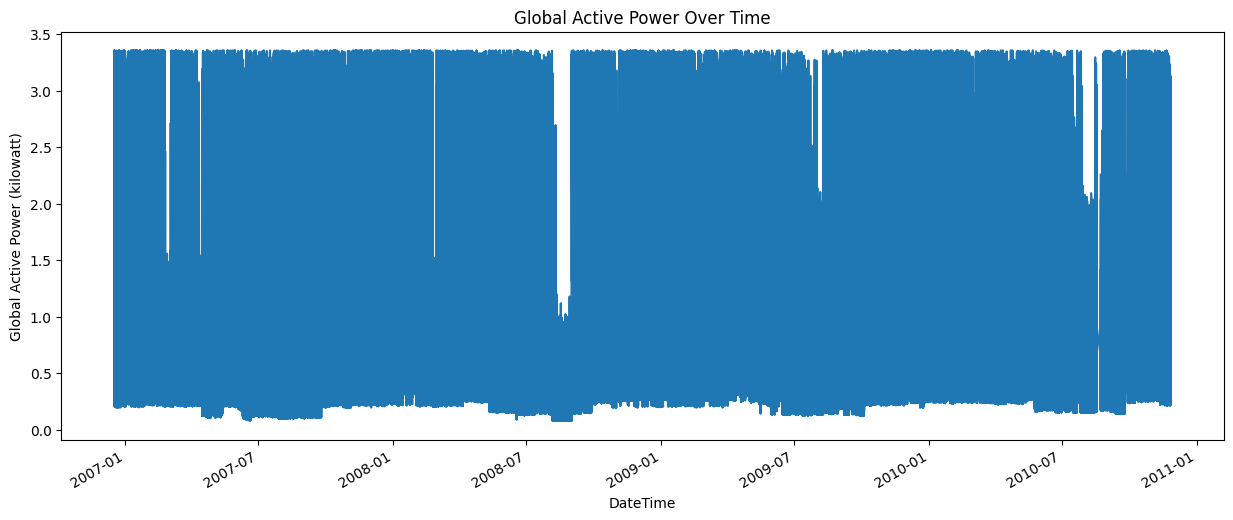

In [66]:
# Defining 'DateTime' as the index of dataset_cleaned
dataset_cleaned.set_index('DateTime', inplace=True)

# Plot Global Active Power over Time.
dataset_cleaned['Global_active_power'].plot(figsize=(15, 6), title='Global Active Power Over Time')
plt.ylabel('Global Active Power (kilowatt)')
plt.show()

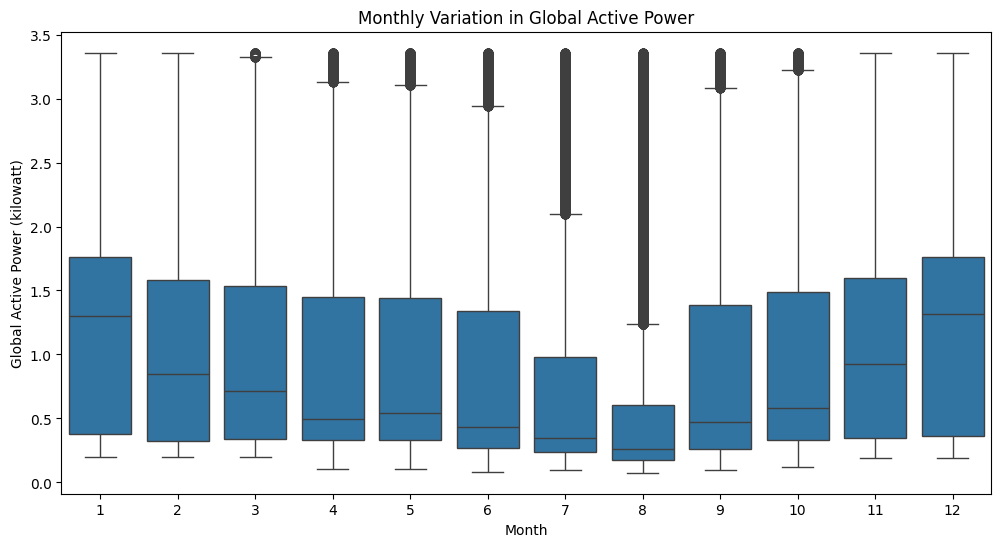

In [67]:
# Plot Global Active Power over Time (Grouped by Month)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Global_active_power', data=dataset_cleaned)
plt.title('Monthly Variation in Global Active Power')
plt.xlabel('Month')
plt.ylabel('Global Active Power (kilowatt)')
plt.show()

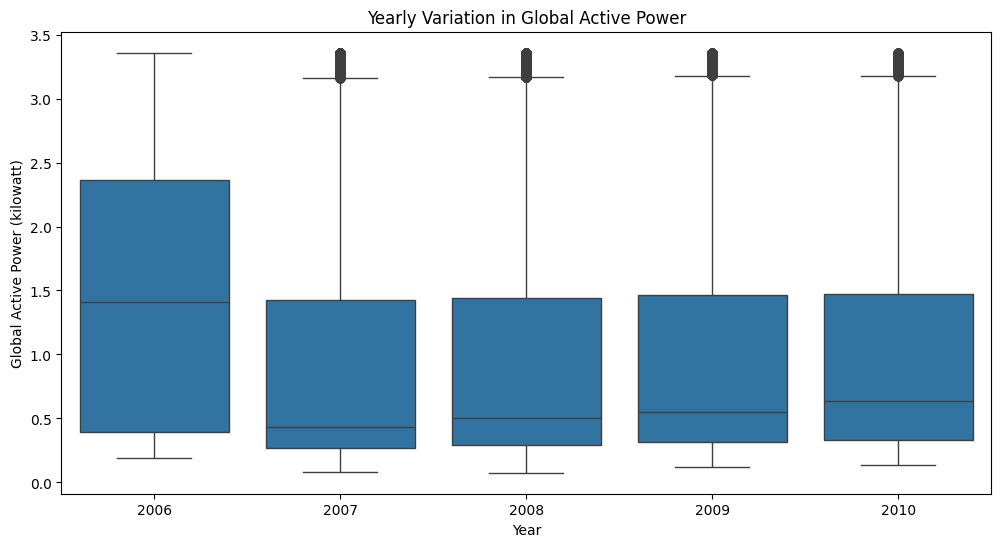

In [68]:
# Plot Global Active Power over Time (Grouped by Year)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Global_active_power', data=dataset_cleaned)
plt.title('Yearly Variation in Global Active Power')
plt.xlabel('Year')
plt.ylabel('Global Active Power (kilowatt)')
plt.show()

<Figure size 1400x700 with 0 Axes>

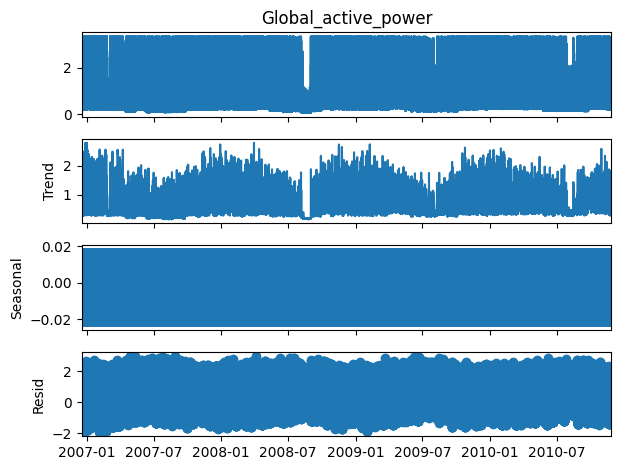

In [75]:
# Plot Global Active Power over Time to unfold trends
decomposition = seasonal_decompose(dataset_cleaned['Global_active_power'], model='additive', period=365)

plt.figure(figsize=(14, 7))
decomposition.plot()
plt.show()

<ipython-input-70-27199c9dd3fa>:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_consumption = dataset_cleaned.resample('H').sum()
<ipython-input-70-27199c9dd3fa>:7: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_consumption = dataset_cleaned.resample('A').sum()


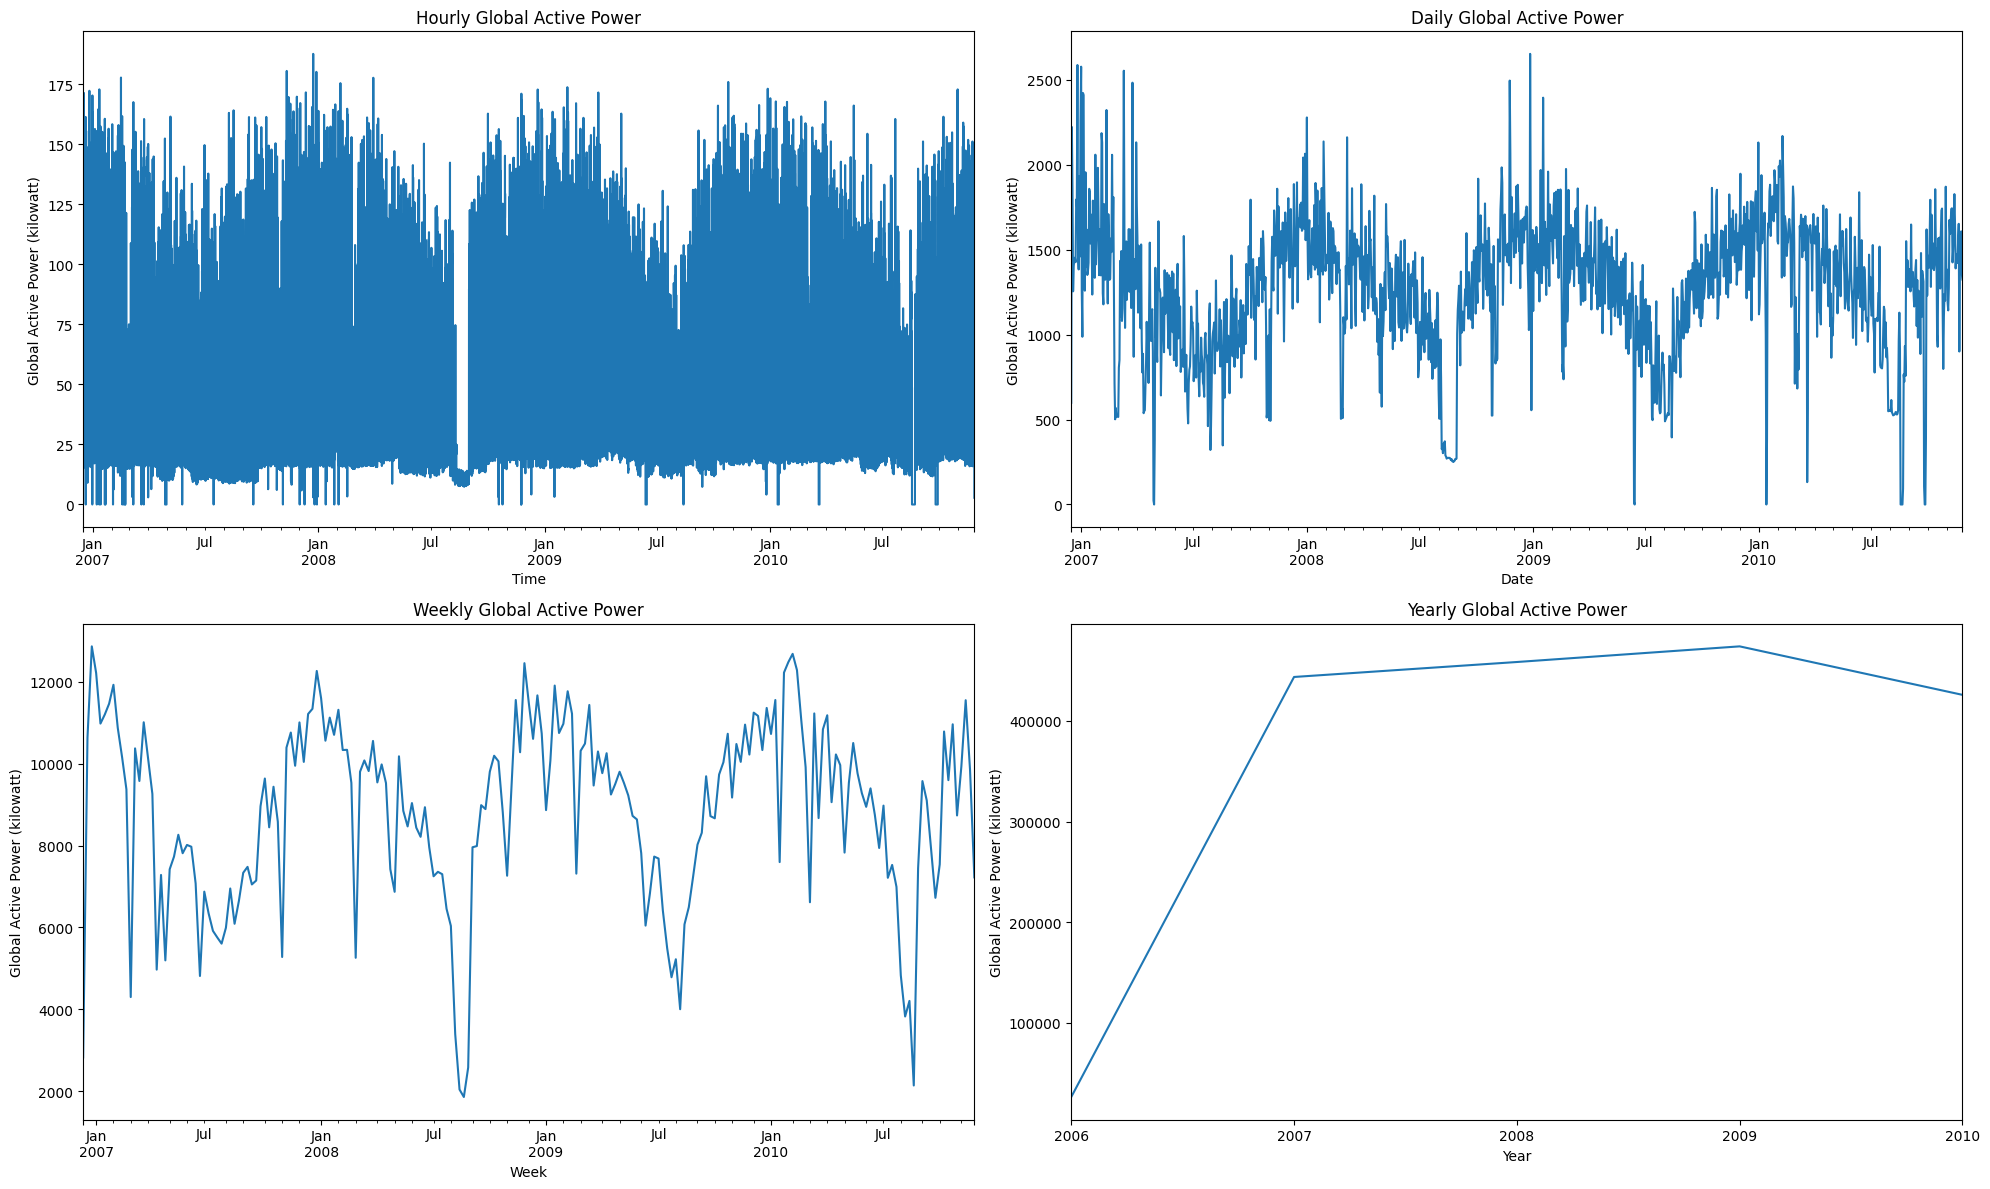

In [70]:
# Plot Global Active Power over Time (Grouped by hour, day, week, and year)

# Resample the dataset for different time frames: hourly, daily, weekly, and yearly
hourly_consumption = dataset_cleaned.resample('H').sum()
daily_consumption = dataset_cleaned.resample('D').sum()
weekly_consumption = dataset_cleaned.resample('W').sum()
yearly_consumption = dataset_cleaned.resample('A').sum()

# Create subplots for each time frame
plt.figure(figsize=(20, 12))

# Hourly Consumption
plt.subplot(2, 2, 1)
hourly_consumption['Global_active_power'].plot(title='Hourly Global Active Power', xlabel='Time', ylabel='Global Active Power (kilowatt)')

# Daily Consumption
plt.subplot(2, 2, 2)
daily_consumption['Global_active_power'].plot(title='Daily Global Active Power', xlabel='Date', ylabel='Global Active Power (kilowatt)')

# Weekly Consumption
plt.subplot(2, 2, 3)
weekly_consumption['Global_active_power'].plot(title='Weekly Global Active Power', xlabel='Week', ylabel='Global Active Power (kilowatt)')

# Yearly Consumption
plt.subplot(2, 2, 4)
yearly_consumption['Global_active_power'].plot(title='Yearly Global Active Power', xlabel='Year', ylabel='Global Active Power (kilowatt)')

plt.tight_layout()
plt.show()

5. **Correlation Analysis:** A correlation matrix enables exploring the relationships between different numerical features. This analysis can highlight potential dependencies and associations between attributes, aiding in feature selection and model development.


**Using Correlation Matrix for Feature Selection**

In data analysis and machine learning, understanding the relationships between features is crucial for both interpreting data and improving model performance. A **correlation matrix** is a powerful tool that provides a comprehensive overview of how each variable in a dataset relates to the others. By quantifying the degree to which pairs of variables are linearly related, it offers valuable insights that can guide the feature selection process.

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have:
- A correlation of 1, they have a perfect positive linear relationship.
- A correlation of -1, they have a perfect negative linear relationship.
- A correlation of 0, there is no linear relationship between them.

Feature selection involves choosing a subset of relevant features for use in model construction. The correlation matrix is instrumental in this process for several reasons:
- **Reducing Dimensionality:** It helps in identifying the relevant features to be analysing, consequently reducing the number of features, simplifying the model, reducing the risk of overfitting, and can improve model performance.
- **Enhancing Interpretability:** By focusing on a subset of relevant and relatively independent features, we can build models that are simpler and more straightforward to explain.
- **Improving Accuracy:** Removing redundant features can lead to more accurate models by reducing the noise in the training data.

**Visualizing the Correlation Matrix**

The visualization of a correlation matrix using a heatmap is a straightforward way to grasp the relationships between features at a glance. Heatmaps color-code the cells based on the correlation values, making it easier to identify highly correlated pairs or variables that are not linearly related at all.

By systematically analyzing and visualizing the correlation matrix, data scientists can make informed decisions on which features to include in their models, ultimately leading to more efficient, accurate, and interpretable outcomes.

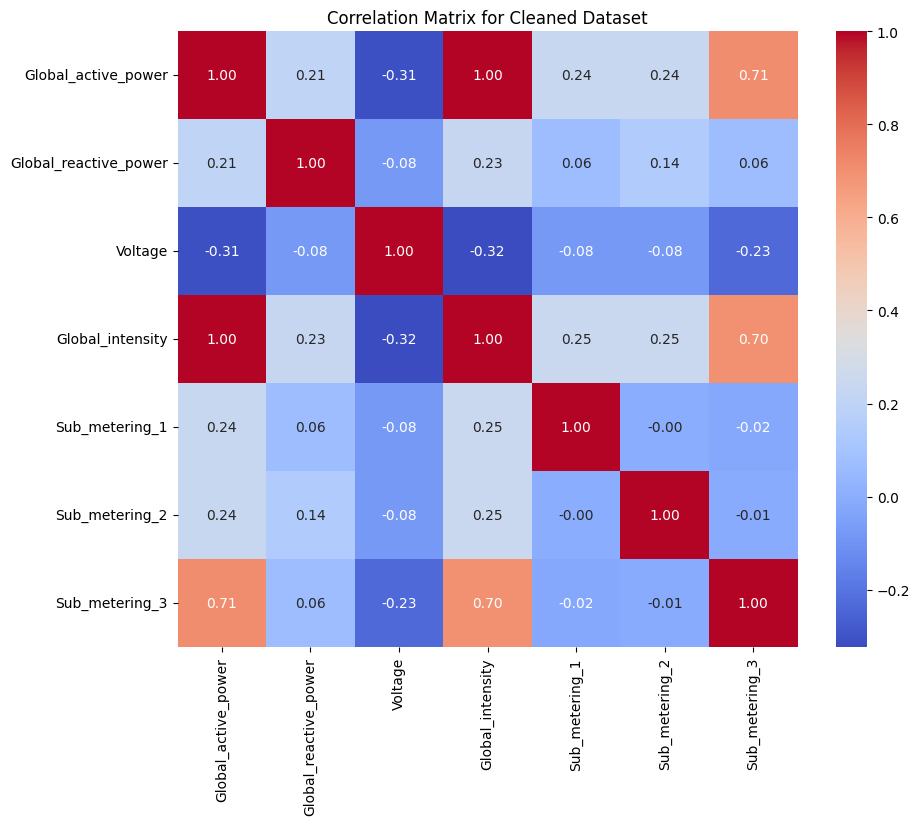

In [71]:
# Calculate the correlation matrix for dataset_cleaned
corr_matrix_cleaned = dataset_cleaned[numeric_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_cleaned, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix for Cleaned Dataset')
plt.show()

6. **Visual Exploration of Relationships:** Scatter plots and pair plots allowed us to visually inspect the relationships between pairs of variables, providing insights into the linear and nonlinear associations that exist within the data.

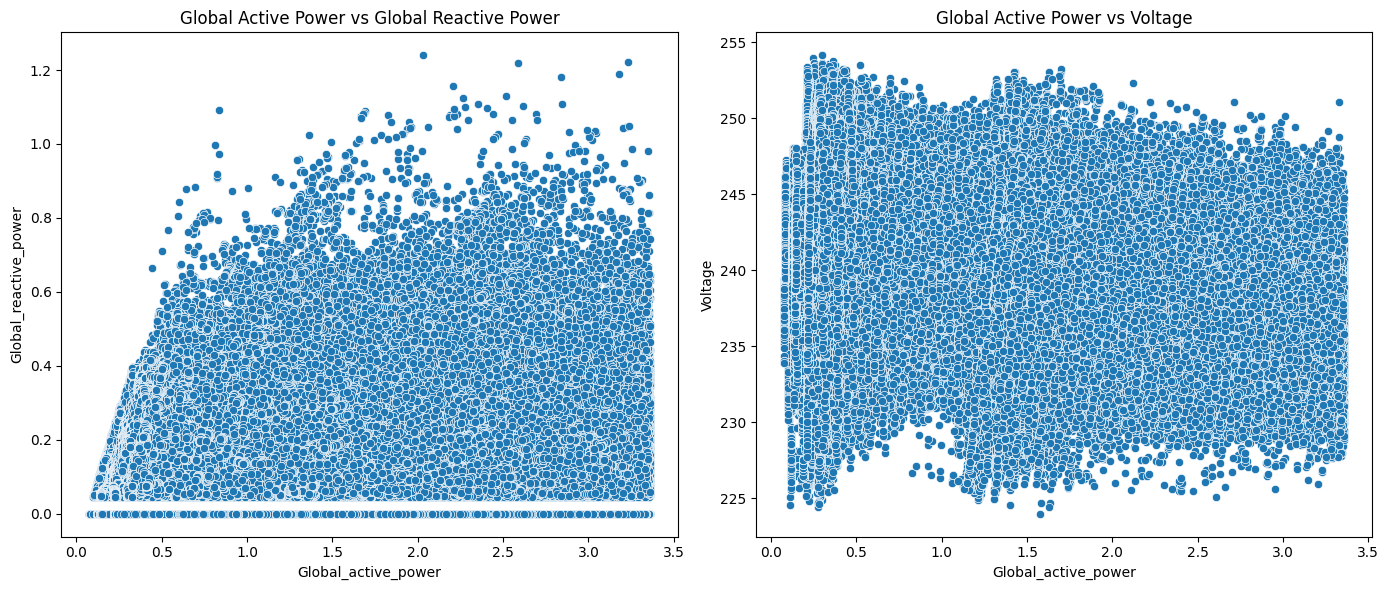

In [72]:
plt.figure(figsize=(14, 6))

# Relationship between Global Active Power and Global Reactive Power
plt.subplot(1, 2, 1)
sns.scatterplot(x='Global_active_power', y='Global_reactive_power', data=dataset_cleaned)
plt.title('Global Active Power vs Global Reactive Power')

# Relationship between Global Active Power and Voltage
plt.subplot(1, 2, 2)
sns.scatterplot(x='Global_active_power', y='Voltage', data=dataset_cleaned)
plt.title('Global Active Power vs Voltage')

plt.tight_layout()
plt.show()

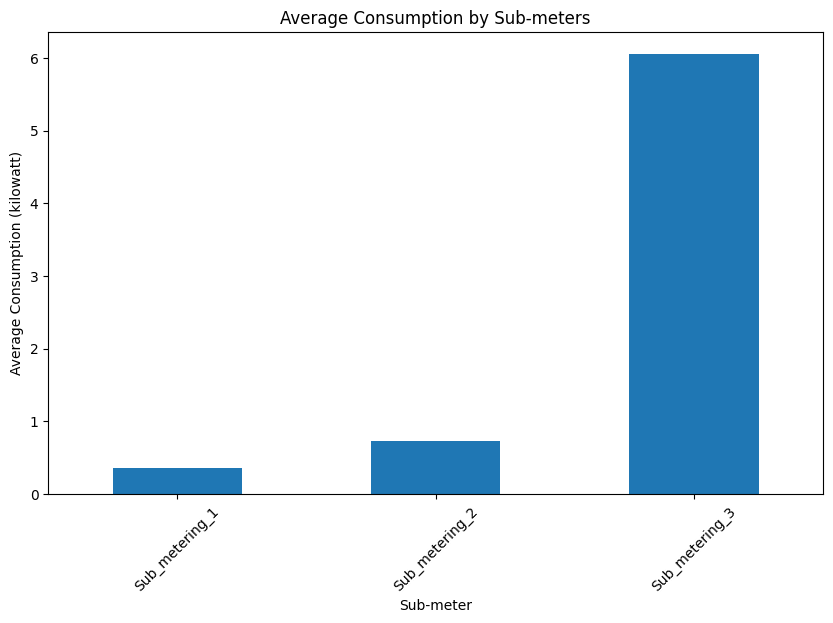

In [73]:
sub_metering_cols = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
dataset_cleaned[sub_metering_cols].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Average Consumption by Sub-meters')
plt.xlabel('Sub-meter')
plt.ylabel('Average Consumption (kilowatt)')
plt.xticks(rotation=45)
plt.show()

# Keep practicing!

You can reuse the above code for pre-processing and exploring other dataset. Learn how you could adapt the codes for various cases.